환율 데이터 
==

In [ ]:
# !pip install finance-datareader
# !pip install pykrx
# !pip install bs4
# !pip install html5lib
!pip3 install lxml

In [ ]:
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
import requests
import re


from datetime import datetime 
from bs4 import BeautifulSoup
from pykrx import stock
%matplotlib inline

In [ ]:
ex_df = fdr.DataReader('USD/KRW', '2017')
print(ex_df)

              Close     Open     High      Low  Change
Date                                                  
2017-01-02  1203.93  1206.85  1210.70  1203.19 -0.0028
2017-01-03  1206.82  1203.93  1212.81  1201.39  0.0024
2017-01-04  1196.15  1206.82  1210.11  1194.89 -0.0088
2017-01-05  1182.19  1196.56  1196.72  1181.17 -0.0117
2017-01-06  1202.00  1181.79  1202.33  1180.19  0.0168
...             ...      ...      ...      ...     ...
2022-05-13  1278.45  1290.87  1291.74  1278.22 -0.0095
2022-05-16  1280.38  1278.56  1286.56  1276.16  0.0015
2022-05-17  1266.50  1280.64  1281.44  1264.02 -0.0108
2022-05-18  1275.33  1266.80  1276.98  1263.93  0.0070
2022-05-19  1275.75  1275.85  1276.90  1272.40  0.0003

[1404 rows x 5 columns]


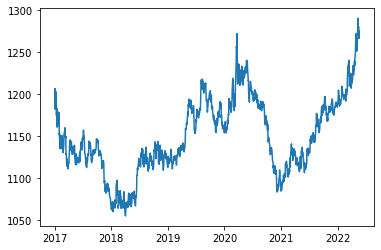

In [ ]:
plt.plot(ex_df['Close'])
plt.show()



---

코스피 수익률
==


In [ ]:
stock_df = stock.get_index_ohlcv_by_date("20170101", "20220516", '1001')

In [ ]:
stock_df.head(2)

코스피,시가,고가,저가,종가,거래량,거래대금
날짜,,,,,,
2017-01-02,2022.23,2031.79,2015.68,2026.16,229874996,2616791314513
2017-01-03,2034.31,2044.07,2028.47,2043.97,268127309,3725113184536


In [ ]:
stock_df['수익률'] = stock_df['종가'] / stock_df['종가'][0]
stock_df.tail()

코스피,시가,고가,저가,종가,거래량,거래대금,수익률
날짜,,,,,,,
2022-05-10,2590.13,2602.75,2553.01,2596.56,841463317,10842463041698,1.281518
2022-05-11,2586.52,2599.11,2579.09,2592.27,679509759,8608259453968,1.279400
2022-05-12,2569.50,2591.57,2546.80,2550.08,900330795,12167915258889,1.258578
2022-05-13,2570.01,2605.84,2565.96,2604.24,788539195,10342060894273,1.285308
2022-05-16,2624.69,2629.20,2593.61,2596.58,780198956,8528536948653,1.281528


In [ ]:
diff = stock_df.index[-1] - stock_df.index[0]
N = diff.days / 252

In [ ]:
기간수익률 = stock_df['수익률'][-1]
연복리수익률 = (기간수익률 ** (1/N))-1

In [ ]:
def 연복리수익률(df):
    기간수익률 = df['종가'][-1] / df['종가'][0]
    delta = df.index[-1] - df.index[0]
    N = delta.days / 252
    return (기간수익률 ** (1/N)) -1

In [ ]:
연복리수익률(stock_df) * 100 

3.2406521041772107

In [ ]:
def 월복리수익률(df):
    기간수익률 = df['종가'][-1] / df['종가'][0]
    delta = df.index[-1] - df.index[0]
    N = delta.days / 21
    return (기간수익률 ** (1/N)) -1

In [ ]:
월복리수익률(stock_df) * 100

0.26612436082056323



---


네이버금융 재무제표 크롤링(1)
==

In [ ]:
# 오늘날 코스피에 상장되어 있는 주식의 이름과 티커 수집 
today = datetime.today().strftime("%Y%m%d") 
ticker_list = stock.get_market_ticker_list(date = today, market="KOSPI") 
symbol_list = [] 
for ticker in ticker_list: 
  symbol = stock.get_market_ticker_name(ticker) 
  symbol_list.append(symbol) 

# 코스피 상장 주식의 개수 확인 
print(len(ticker_list)) 
print(len(symbol_list))

940
940


In [ ]:
df_우 = [s for s in symbol_list if s.endswith('우') | s.endswith('우B') | s.endswith('우(전환)')]
res = [i for i in symbol_list if i not in df_우]

ticker = pd.DataFrame(ticker_list)
symbol = pd.DataFrame(symbol_list)
sol = pd.concat([ticker, symbol], axis=1)
sol.columns= ['종목코드', '종목명']
kospi_df = sol[sol['종목명'].isin(res)]
kospi_df.reset_index(inplace=True)
kospi_df.drop('index', axis=1, inplace=True)
kospi_df['종목코드'] = kospi_df['종목코드'].astype('str')
ticker_ks = kospi_df['종목코드'].tolist()
print(len(ticker_ks))
kospi_df

820


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,종목코드,종목명
0,095570,AJ네트웍스
1,006840,AK홀딩스
2,027410,BGF
3,282330,BGF리테일
4,138930,BNK금융지주
...,...,...
815,005870,휴니드
816,079980,휴비스
817,005010,휴스틸
818,000540,흥국화재


In [ ]:
a = ['000540','003280']
b = ['흥아해운','고곡해운']

In [ ]:
finance_df = []

for ticker in ticker_ks: 
  URL = f"https://finance.naver.com/item/main.nhn?code={ticker}" 
  ref = requests.get(URL, headers={'User-agent':'Mozilla/5.0'}) 
  html = ref.text 
  soup = BeautifulSoup(html, 'html.parser') 
  finance_html = soup.select('div.section.cop_analysis div.sub_section')[0]
  th_data = [item.get_text().strip() for item in finance_html.select('thead th')] 
  annual_date = th_data[3:7] 
  quarter_date = th_data[7:13] 
  finance_index = [item.get_text().strip() for item in finance_html.select('th.h_th2')][3:] 
  finance_data = [item.get_text().strip() for item in finance_html.select('td')] 
  finance_data = np.array(finance_data) 
  finance_data.resize(len(finance_index), 10) 
  finance_date = annual_date + quarter_date 
  finance = pd.DataFrame(data=finance_data[0:,0:], index=finance_index, columns=finance_date) 
  finance_df.append(finance)

IndexError: ignored

In [ ]:
a = ['000540', '003280']
b = ['흥아해운', '고곡해운']

In [ ]:
import pandas as pd 
import requests 

for ticker in a: 
  url = f"https://finance.naver.com/item/main.nhn?code={ticker}" 
  html = requests.get(url, headers={'User-agent':'Mozilla/5.0'}) 
  soup = BeautifulSoup(html.text, "lxml") 
  stmt = pd.read_html(html.text)[3] 
  stmt.set_index(('주요재무정보', '주요재무정보', '주요재무정보'), inplace=True)
  for symbol in b: 
    stmt.index.rename(symbol, inplace=True) 
  stmt.columns = stmt.columns.droplevel(0)
  stmt.columns = stmt.columns.droplevel(1) 
  # for i in len(a):
    
    
# stmt_df = pd.concat(stmt)
  # yf = pd.read_html(r.text)[9]
  # bb = yf.iloc[0][1]
  # if not bb:
  #   bb = []
  #   cc.append(bb)
  # else:
  #   cc.append(bb)

In [ ]:
stmt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 매출액 to 배당성향(%)
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   2019.12     14 non-null     object 
 1   2020.12     14 non-null     object 
 2   2021.12     13 non-null     float64
 3   2022.12(E)  0 non-null      float64
 4   2020.12     13 non-null     float64
 5   2021.03     13 non-null     float64
 6   2021.06     13 non-null     float64
 7   2021.09     13 non-null     float64
 8   2021.12     13 non-null     float64
 9   2022.03(E)  0 non-null      float64
dtypes: float64(8), object(2)
memory usage: 1.4+ KB


In [ ]:
req = requests.get('https://finance.naver.com/sise/sise_market_sum.naver?sosok=0')
html = req.text
soup = BeautifulSoup(html)

# finding last page
last_page = soup.find('td',{'class':'pgRR'})
last_number = re.findall(r'\d+', last_page.a.get('href'))[1]

db = pd.DataFrame()

# page iteration
for i in range(1, int(last_number)+1):
  #KOSPI
  req = requests.get('https://finance.naver.com/sise/sise_market_sum.nhn?&page='+str(i))
  html = req.text
  soup = BeautifulSoup(html)

  # find company list for each page
  company_list = soup.find_all('a', {'class':'title'})

  # company iteration for each page
  for company in company_list:
      company_code = re.search('\d+', company.get('href')).group()
      company_name = company.text

      # extracting financial statement
      company_url = 'https://finance.naver.com/item/main.nhn?code=' + str(company_code)
      df = pd.read_html(company_url, encoding='euc-kr')[3]

      # ETF exception 
      if df.columns[0] == '구성종목(구성자산)' or df.columns[0] == 0 or df.iloc[:, 1:].isnull().all(axis=None): continue

      # dataframe arrange
      df.columns = df.columns.droplevel([0,2])
      df.index = df['주요재무정보']
      df_arrange = df.iloc[:,1:]

      data = pd.DataFrame(df_arrange.stack(dropna=False))
      if company_name == company_list[0]:
        index = data.index.to_flat_index()
      data.index = index 

      df2 = pd.DataFrame([company_code, company_name], index=['code', 'name'])
      df2 = df2.append(data).T

      print(company_name)
      db = db.append(df2, ignore_index=True)

#save to csv file
db.to_csv('/content/drive/MyDrive/프로젝트1 데이터/코스피재무제표.csv', index = False, encoding = 'utf-8-sig')

In [ ]:
import pandas as pd
import requests
cc = []

for ticker in ticker_ks:
  URL = f"https://finance.naver.com/item/main.nhn?code={ticker}"
  r = requests.get(URL, headers={'User-agent':'Mozilla/5.0'}) 
  yf = pd.read_html(r.text)[9]
  yf = yf.iloc[0][1]
  cc.append(yf)

IndexError: ignored

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

url = 'https://finance.naver.com/item/main.nhn?code=035720' # 카카오(035720) 네이버 금융 홈페이지 주소
html = requests.get(url).text
soup = BeautifulSoup(html)
table_html = soup.find('table', {'class' : 'tb_type1 tb_num tb_type1_ifrs'})   # 특정 테이블 태그를 가져옴     
table_html = str(table)      # 'table'변수는 bs4.element.tag 형태이기 때문에 table를 문자열 형태로 바꿔준다  
table_df_list = pd.read_html(table_html)   # read_html 사용해서 html을 데이터프레임들로 이루어진 리스트로 바꿔줌  
table_df = table_df_list[0]    # 원하는 데이터프레임을 가져온다  

NameError: ignored

In [ ]:
cc

['11.09배',
 '8.56배',
 '6.37배',
 '6.37배',
 '5.42배',
 '5.91배',
 '7.97배',
 '47.68배',
 '11.25배',
 '12.16배',
 '12.17배',
 '4.20배',
 '31.42배',
 '3.35배',
 '6.82배',
 '10.41배',
 '5.42배',
 '5.91배',
 '8.56배',
 '7.53배',
 '7.53배',
 '13.17배',
 '9.61배',
 '4.18배',
 '6.36배']

In [ ]:
oo = np.nan
oo

nan

In [ ]:
cc

['11.09배',
 '8.56배',
 '6.37배',
 '6.37배',
 '5.42배',
 '5.91배',
 '7.97배',
 '47.68배',
 '11.25배',
 '12.16배',
 '12.17배',
 '4.20배',
 '31.42배',
 '3.35배',
 '6.82배',
 '10.41배',
 '5.42배',
 '5.91배',
 '8.56배',
 '7.53배',
 '7.53배',
 '13.17배',
 '9.61배',
 '4.18배',
 '6.36배']



---

네이버 재무제표 크롤링(2)
==

In [ ]:
import pandas as pd
import requests
cc = []

for ticker in list:
  URL = f"https://finance.naver.com/item/main.nhn?code={ticker}"
  r = requests.get(URL, headers={'User-agent':'Mozilla/5.0'})
  yf = pd.read_html(r.text)[9]
  bb = yf.iloc[0][1]
  if not bb:
    bb = []
    cc.append(bb)
  else:
    cc.append(bb)



---

PER과 종가 비교
==

In [ ]:
df1 = stock.get_market_ohlcv_by_date('20170101', '20220516', '005930')

In [ ]:
df2 = stock.get_market_fundamental_by_date('20170101', '20220516', '005930')

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backen

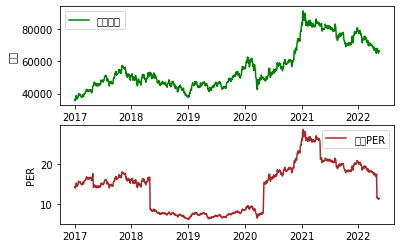

In [ ]:
plt.subplot(211)
plt.plot(df1.index, df1['종가'], color='green', label='삼전주가')
plt.ylabel('종가')
plt.legend()

plt.subplot(212)
plt.plot(df2.index, df2['PER'], color='brown', label = '삼전PER')
plt.ylabel('PER')
plt.legend()

plt.show()